<a href="https://colab.research.google.com/github/MohamedMiladi777/exercices-university-of-Turku/blob/main/DTEK0042_Exercise_4_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTEK0042 Exercise 4
    Group Members:
    1. first name last name
    2. first name last name
    3. first name last name

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a SCG signal step-by-step as

1.   List item
2.   List item

outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given SCG signals. Please provide caption and description for every figure.



```
# This is formatted as code
```

## 1- library Imports

In [1]:
#scipy imports
#import scipy
from scipy import signal,stats
#from scipy.signal import butter, filtfilt, freqz

#numpy imports
import numpy as np

#matplotlib imports
import matplotlib.pyplot as plt

#sklean imports
from sklearn.decomposition import PCA
from sklearn import preprocessing as prep
#other imports
from glob import glob

# Data Import
* Load the .txt files of SCG data that are stored in the folder named “dataset” into your python environment.  
* For each .txt data file, select the 3rd column which contains the Z-axis of the SCG signals.
* Note: the sampling frequency of this signal is 200 Hz.

        Hint:  
        * to automate the loading process you can get a list of all data file paths using glob package and subsequently load the files in a for loop.
        
        * dataFiles = glob.glob(path_to_dataset) to get a list of file paths of "dataset\xxdata.txt"
        
         then load the paths one by one in a loop

In [2]:
fs=200 #samp freq
# Import necessary libraries
import numpy as np
from glob import glob

# Define path to the dataset (adjust based on where the folder is located)
path_to_dataset = "dataset/*.txt"  # Modify if the path is different
dataFiles = glob(path_to_dataset)

# Initialize an empty list to store Z-axis data
z_axis_data = []

#  Loop through each file and load the 3rd column (Z-axis)
for file in dataFiles:
    data = np.loadtxt(file)  # Load the .txt file
    z_axis = data[:, 2]  # Select the 3rd column (index 2)
    z_axis_data.append(z_axis)

#  Check the shape of the imported Z-axis data
print(f"Loaded {len(z_axis_data)} files.")


Loaded 8 files.


# Noisy Vs Normal Plotting

* Plot the z-axis SCG signal from the file "Noisy_data_1.txt" and plot the z-axis SCG signal from the file "Normal_data_1.txt"
* Describe your observations and how the plots differ from one another.


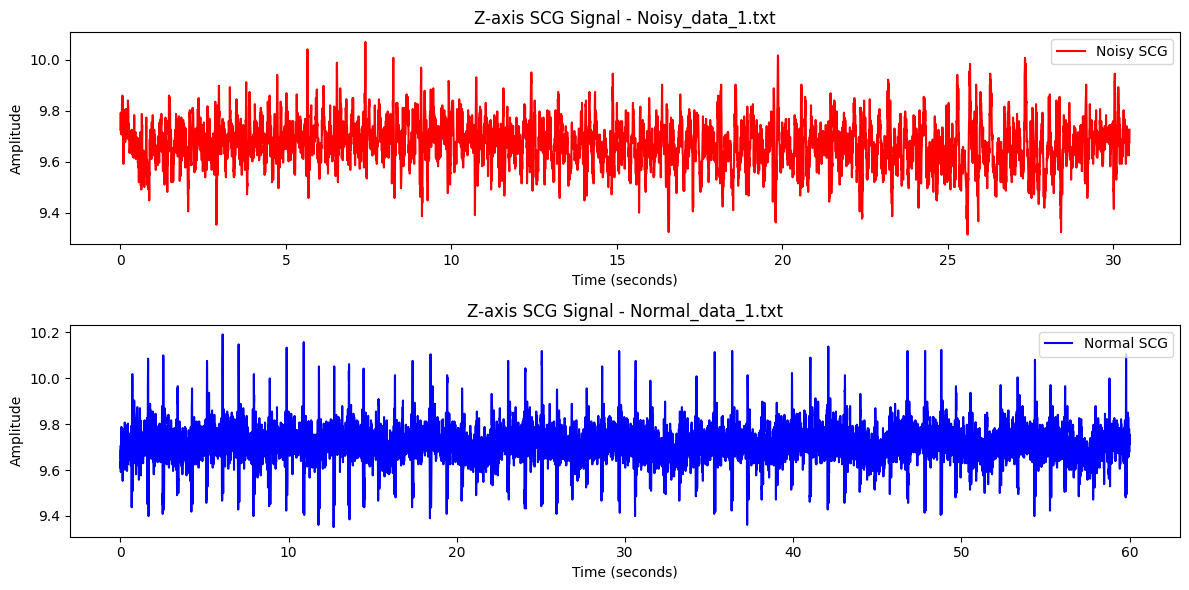

In [3]:
# Load and plot Z-axis SCG signal from Noisy_data_1.txt and Normal_data_1.txt
noisy_data_path = "/content/dataset/Noisy_data_1.txt"
normal_data_path = "/content/dataset/Normal_data_1.txt"

# Load the data from the files
noisy_data = np.loadtxt(noisy_data_path)
normal_data = np.loadtxt(normal_data_path)

# Select the 3rd column (Z-axis) for both files
z_noisy = noisy_data[:, 2]
z_normal = normal_data[:, 2]

# Define the time axis (sampling frequency is 200 Hz)
sampling_freq = 200  # Hz
time_noisy = np.arange(len(z_noisy)) / sampling_freq
time_normal = np.arange(len(z_normal)) / sampling_freq

# Plotting the Z-axis of the SCG signals
plt.figure(figsize=(12, 6))

# Plot for Noisy_data_1.txt
plt.subplot(2, 1, 1)
plt.plot(time_noisy, z_noisy, label="Noisy SCG", color='r')
plt.title('Z-axis SCG Signal - Noisy_data_1.txt')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.legend()

# Plot for Normal_data_1.txt
plt.subplot(2, 1, 2)
plt.plot(time_normal, z_normal, label="Normal SCG", color='b')
plt.title('Z-axis SCG Signal - Normal_data_1.txt')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.legend()

plt.tight_layout()
plt.show()


The plots illustrate two different Z-axis SCG (Seismocardiography) signals over time. Here's a breakdown of the key differences:

    * Signal Appearance: The top plot ("Noisy SCG") shows a signal with high-frequency fluctuations and appears less structured. The bottom plot ("Normal SCG") displays a more periodic signal with distinct peaks and troughs.

    * Amplitude Range:  The "Noisy SCG" signal has a smaller amplitude range, mostly staying between 9.4 and 10.0. The "Normal SCG" signal has a slightly wider amplitude range, roughly between 9.4 and 10.2.

    * Time Duration: The "Noisy SCG" signal is recorded for a shorter duration (around 30 seconds) compared to the "Normal SCG" signal (around 60 seconds).

    
  

# Data Segmentation
* Here is a simple function to use for data segmentation
* Segment the Z-axis signals into 5-second segments
* The sampling frequency used to record these signals is 200 Hz.
* Store the segments and the accompanying labels

In [10]:
#code (provided)

def _slicing(sig, file_label, segment_length = 1000):

    """
    inputs:
    sig : input array to be segmented
    file_label : label to be applied to segmented signal
    segment_length : Length in samples of the segments produced from the input signal

    outputs:
    sig_sliced : a list of segments
    label : a list of corresponding labels for the segmented signal

    """

    sig_sliced = []
    label = []

    # slicing

    for i in np.arange(int(len(sig)/segment_length)):

        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )

        label.append(file_label)

    return (sig_sliced , label)

In [5]:
# Define the segment length based on the sampling frequency
segment_length = 1000  # 5 seconds * 200 Hz

# Segment the noisy SCG signal
noisy_segments, noisy_labels = _slicing(z_noisy, 'Noisy')

# Segment the normal SCG signal
normal_segments, normal_labels = _slicing(z_normal, 'Normal')

# Combine segments and labels
segments = noisy_segments + normal_segments
labels = noisy_labels + normal_labels

# Print the number of segments created for each type
print(f'Number of noisy segments: {len(noisy_segments)}')
print(f'Number of normal segments: {len(normal_segments)}')
print(f'Total segments created: {len(segments)}')


Number of noisy segments: 6
Number of normal segments: 12
Total segments created: 18


# Feature Extraction Function Creation
*  Define a function and name it “feature_extraction” in which you compute and return the features listed below
    * *Time Domain Features*:  mean, standard deviation, interquartile-range, median, peak-to-peak range, skewness, kurtosis, and root mean square.
    * *Frequency Domain Features*: power spectral density (using welch function of scipy)
    
        * For power spectral density, Calculate the total power spectral density within frequency bins of 4 Hz steps. Discard the frequencies above 40 Hz. Get the power within each bin.
    
        Hint:
        
        Reference: https://docs.scipy.org/doc/scipy/reference/stats.html for skewness, kurtosis, interquartile-range(iqr)
        
        Reference: https://numpy.org/doc/stable/reference/routines.statistics.html for other time domain features
        
        Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html for transforming to zero mean and unit variance



In [6]:
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import scale

def feature_extraction(sig, fs=200):
    """
    inputs:
    sig : input array to extract features from
    fs : sampling frequency of input array

    outputs:
    feature_array: an array containing all the features extracted from the signal
    """

    ########################################## statistical features - time domain
    mean_value = np.mean(sig)
    std_value = np.std(sig)
    iqr_value = np.percentile(sig, 75) - np.percentile(sig, 25)
    median_value = np.median(sig)
    peak_to_peak = np.ptp(sig)
    skewness_value = skew(sig)
    kurtosis_value = kurtosis(sig)
    rms_value = np.sqrt(np.mean(sig**2))

    time_domain_features = [mean_value, std_value, iqr_value, median_value,
                            peak_to_peak, skewness_value, kurtosis_value, rms_value]

    ########################################## PSD
    # Transforming to zero mean and unit variance for PSD extraction
    transformed_sig = scale(sig)

    # Calculate the power spectral density using Welch's method
    frequencies, PSD = signal.welch(transformed_sig, fs=fs)

    freqs_arr = np.arange(0, 41, 4)
    PSD_binned_sum = []

    for i in range(len(freqs_arr) - 1):
        power_sum = np.sum(PSD[(frequencies >= freqs_arr[i]) & (frequencies < freqs_arr[i + 1])])
        PSD_binned_sum.append(power_sum)

    # Combine all features into a single array
    feature_array = np.array(time_domain_features + PSD_binned_sum)

    return feature_array


# Feature Extraction Application

* You must first segment your signals and then extract features from each segment. You could do it in the following way:



* Call the _slicing function to section all the z-axis data into 5-second segments
        Hint: Load each file in "dataFiles" with for-loop
* Use the feature extraction function you created and extract features from every segment that you have obtained.
* Store the labels and the features you extracted from each segment to numpy arrays.
        Hint: Think of an easy way to extract the label "noisy" or "normal" from each file name
        str.split() could be used somehow in this case

In [7]:
# Initialize lists to hold features and labels
all_features = []
all_labels = []

# Segment length for 5 seconds with 200 Hz sampling frequency
segment_length = 200 * 5  # 1000 samples for 5 seconds

# Loop through each data file and process
for file in dataFiles:
    # Determine the label from the file name
    label = file.split('/')[-1].split('_')[0]  # 'Noisy' or 'Normal'

    # Load the Z-axis data
    data = np.loadtxt(file, usecols=2)  # Load the 3rd column

    # Segment the data using the slicing function
    segments, labels = _slicing(data, label, segment_length)

    # Extract features from each segment
    for seg in segments:
        features = feature_extraction(seg)
        all_features.append(features)
        all_labels.append(label)

# Convert lists to NumPy arrays for easier handling
all_features = np.array(all_features)
all_labels = np.array(all_labels)

print(f"Extracted features shape: {all_features.shape}")
print(f"Extracted labels shape: {all_labels.shape}")


Extracted features shape: (75, 18)
Extracted labels shape: (75,)


# Standardize Features
Hint:

    Use sklearn.preprocessing.scale() to standardize the features
    Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [8]:
from sklearn.preprocessing import scale

# Standardize the features
standardized_features = scale(all_features)

print(f"Standardized features shape: {standardized_features.shape}")


Standardized features shape: (75, 18)


# Principal Component Analysis
* Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set consisting of many variables correlated with each other. This can then be used to visualize the data in a more practical way.
* Compute the first and 2nd principal components
* Plot the two components on a scatter plot with the coloring done by label
* Are these features useful to seperate the two types of signals (noisy vs normal)?
* Describe your observations.
    
        Hint:
        my_pca=PCA(n_components=2)
        pca_out = my_pca.fit_transform(input)

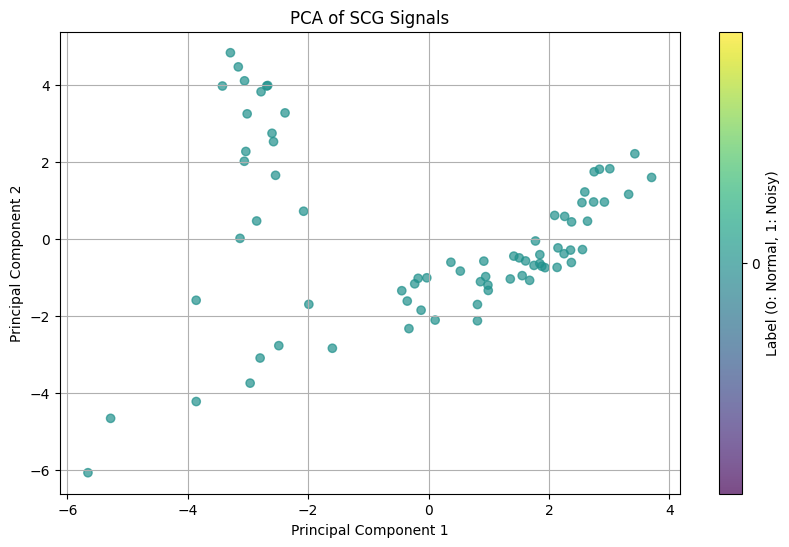

Explained variance ratio: [0.32892179 0.26483277]
['Noisy']
Counts:
Noisy: 0
['dataset/Normal_data_3.txt', 'dataset/Noisy_data_1.txt', 'dataset/Noisy_data_2.txt', 'dataset/Noisy_data_4.txt', 'dataset/Normal_data_1.txt', 'dataset/Normal_data_2.txt', 'dataset/Normal_data_4.txt', 'dataset/Noisy_data_3.txt']


In [9]:
from sklearn.decomposition import PCA

# Perform PCA
my_pca = PCA(n_components=2)
pca_out = my_pca.fit_transform(standardized_features)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_out[:, 0], pca_out[:, 1], c=[1 if label == 'noisy' else 0 for label in all_labels], alpha=0.7)
plt.title('PCA of SCG Signals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(ticks=[0, 1], label='Label (0: Normal, 1: Noisy)')
plt.grid()
plt.show()

# Print explained variance ratio
print(f'Explained variance ratio: {my_pca.explained_variance_ratio_}')
print(np.unique(labels))
# Count occurrences of each label
print("Counts:")
for label in np.unique(labels):
    print(f"{label}: {np.sum(labels == label)}")

print(dataFiles)






# Observations